# Jamboree Case Study

### About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### How can you help here?

The company wants to know:
* Which variables are significant in predicting the chances of a student getting into an IVY league college
* How well some variables like GRE Scores, TOEFL Scores, University rating etc. can predict the chances of a student getting into an IVY league college
* Predict the chances of a student getting into an IVY League college using the variables like GRE Scores, TOEFL Scores, University rating etc.

### Column Profiling:

* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

### Objective:
1. Perform basic univariate data analysis about each column of the data and find missing values/outliers
2. Find which features contribute the most towards chance of admit using EDA (bi-variate analysis) and Hypothesis testing
3. Check correlation among independent variables and how they interact with each other
4. Perform data preprocessing - Duplicate value check, missing value check, outlier treatment, feature engineering and data preparation for modeling
4. Test the assumptions of linear regression 
5. Use Linear Regression from (Statsmodel library) and explain the results, try out different linear regressions (L1/L2/ElasticNet)
6. Do model evaluation
7. Provide actionable Insights & Recommendations

**Dataset link:**  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

In [1]:
# Import required libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats
import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from scipy.sparse import hstack,vstack

warnings.filterwarnings('ignore')

### Reading and Understanding of Data

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
337,338,332,118,5,5.0,5.0,9.47,1,0.94
150,151,334,114,4,4.0,4.0,9.43,1,0.93
163,164,317,105,3,3.5,3.0,8.56,0,0.68
113,114,320,110,2,4.0,3.5,8.56,0,0.72
414,415,321,110,4,3.5,4.0,8.35,1,0.72


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

- Dropping the column Serial No., as it won't be necessary for analyzing the chance of admit.



In [5]:
df.drop(columns=['Serial No.'],inplace=True)

In [6]:
df.shape

(500, 8)

- There are a total of 500 rows and 8 columns in the dataset 

- In the columns Chance of admit and LOR, there are extra spaces in the end, so we will remove that from the columns name.

In [7]:
df.rename(columns={"Chance of Admit ":"Chance of Admit","LOR ":"LOR"},inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Points:**

- Average GRE Score of all participants is 317 and Average TOEFL score is 107
- Average university rating is 3.11

- Separating numerical and categorical columns for analysis.



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df.nunique().sort_values()

Research               2
University Rating      5
SOP                    9
LOR                    9
TOEFL Score           29
GRE Score             49
Chance of Admit       61
CGPA                 184
dtype: int64

- Even though few columns are integer or float types but they seem to have discrete unique values and hence they are most probably categorical in nature.

In [11]:
cat_columns = ['University Rating','SOP','LOR','Research']
num_columns = list(set(df.columns) - set(cat_columns))

In [12]:
num_columns

['CGPA', 'Chance of Admit', 'GRE Score', 'TOEFL Score']

In [13]:
#### Check for Nulls
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There are no null values in the dataset.However, we will still have to check for outliers in the dataset (excluding the dependent variable).

In [14]:
#Check for duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset

### Analyzing the dependent variable

In [15]:
df['Chance of Admit'].head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [16]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

- Creating a new columns high chance to identify profiles who are most likely to get an admit.



In [17]:
q3 = df['Chance of Admit'].quantile(q=0.75)

df['High Chance'] = df['Chance of Admit'].apply(lambda x: 1 if x>= q3 else 0)

Skew range, current: -0.289966210041158
Skew range, log: -0.8153821572544562
Kurtosis, current: -0.4546817998465431
Kurtosis range, log: 0.5438283413897618


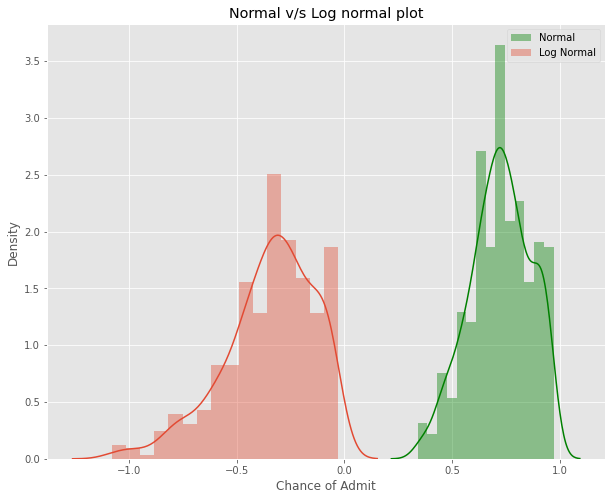

In [18]:
# Density plot for Chance of Admit 

y = df['Chance of Admit']
y_skew = y.skew()
ylog_skew = np.log(y).skew()
y_kurt = y.kurtosis()
ylog_kurt = np.log(y).kurtosis()
print('Skew range, current:',y_skew)
print('Skew range, log:',ylog_skew)
print('Kurtosis, current:',y_kurt)
print('Kurtosis range, log:',ylog_kurt)

plt.figure(figsize=(10,8));
plt.title('Normal v/s Log normal plot')
sns.distplot(y,color='g',label="Normal")
sns.distplot(np.log(y),label="Log Normal")
plt.legend()
plt.show()

- Since the skew and kurtosis values are not improving with transformation, skipping the transformation as such.

### Analyzing the independent variables

In [19]:
cat_columns

['University Rating', 'SOP', 'LOR', 'Research']

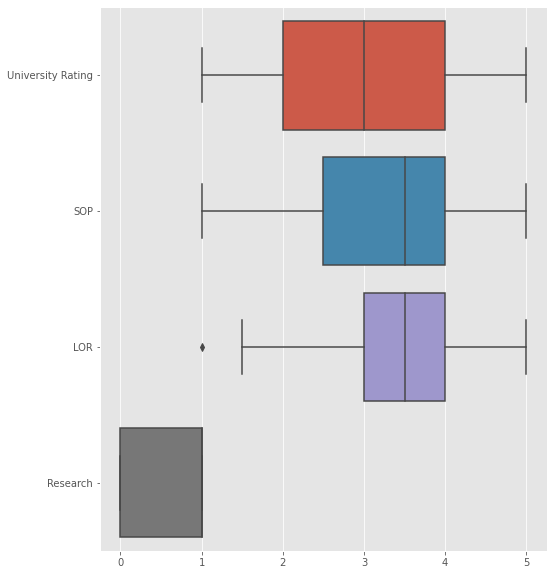

In [20]:
plt.rcParams['figure.figsize'] = 8,10
sns.boxplot(data=df.loc[:,cat_columns],orient='h')
plt.show()   

- An outlier was spotted only in the LOR column (in the left side of plot), we will treat that using IQR method, and it is exactly on LOR = 1

In [21]:
df[df.LOR == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,High Chance
347,299,94,1,1.0,1.0,7.34,0,0.42,0


In [22]:
q1 = df['LOR'].quantile(q=0.25)
q3 = df['LOR'].quantile(q=0.75)

lower_limit = q1 - (q3-q1)*1.5
df['LOR'].loc[df['LOR'] < lower_limit] = np.NaN

# Checked the forward value and it is 2, so it will be safe to replace with forward fill
df['LOR'].fillna(method="ffill",inplace=True)

In [23]:
df.iloc[347]

GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    2.00
CGPA                   7.34
Research               0.00
Chance of Admit        0.42
High Chance            0.00
Name: 347, dtype: float64

**Data Distribution of Categorical Columns**

In [24]:
n_cat_cols = len(cat_columns)

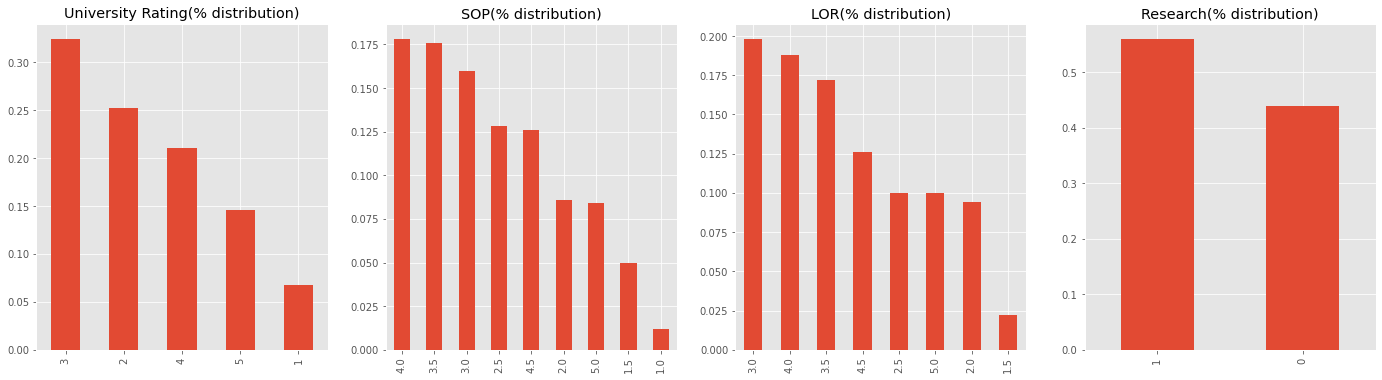

In [25]:
fig,ax = plt.subplots(1,n_cat_cols,figsize=(6*n_cat_cols,6))

for i,col_name in enumerate(cat_columns):
    plt.subplot(1,4,i+1)
    df[col_name].value_counts(normalize=True).plot.bar(title=col_name+"(% distribution)")
plt.show()

In [26]:
# Since 'Chance of Admit' is target variable and already analyzed, lets remove it from num_columns
num_columns.remove('Chance of Admit')
num_columns

['CGPA', 'GRE Score', 'TOEFL Score']

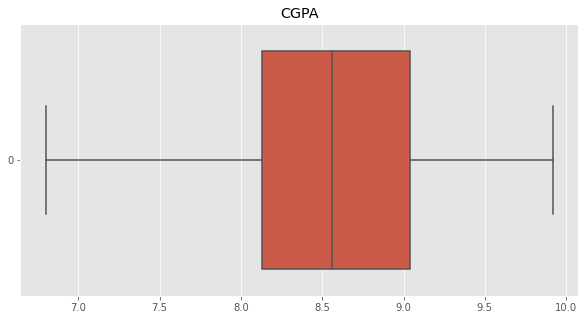

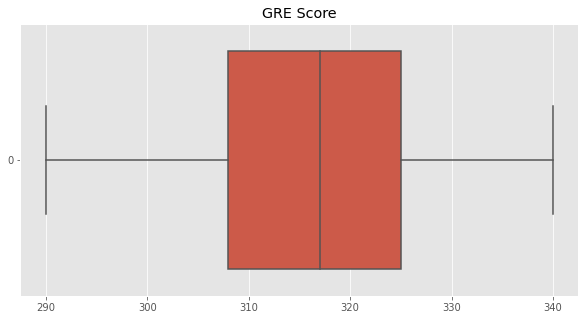

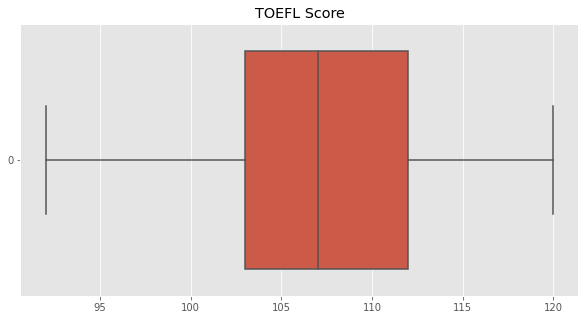

In [27]:
# Check for outliers
plt.rcParams['figure.figsize'] = (10,5)
for i in num_columns:
    sns.boxplot(data=df[i],orient='h')
    plt.title(i)
    plt.show()

- Since numerical columns have no outliers, we can use z-score to analyze the outliers in numerical distributions

**GRE Score**

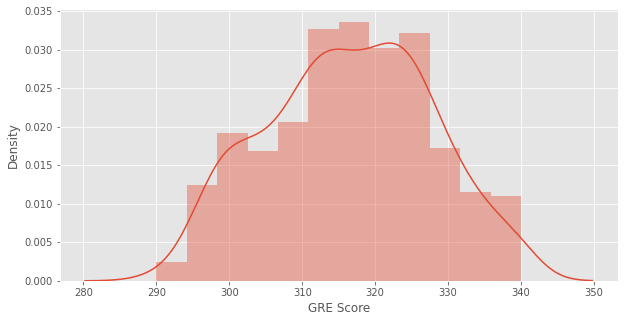

In [28]:
sns.distplot(df['GRE Score'])

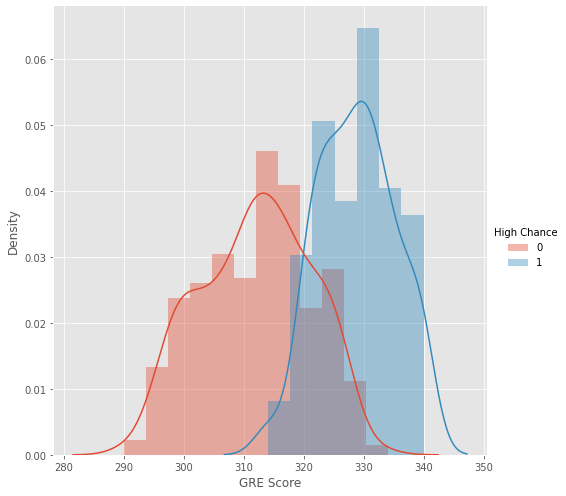

In [29]:
sns.FacetGrid(df,hue='High Chance',height=7).map(sns.distplot,'GRE Score').add_legend()
plt.show()

**TOEFL Score**

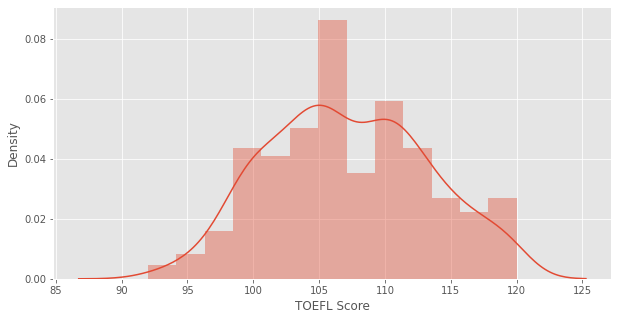

In [30]:
sns.distplot(df['TOEFL Score'])

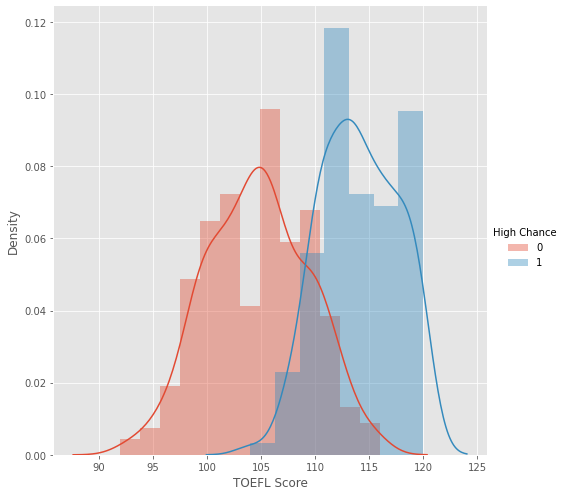

In [31]:
sns.FacetGrid(df,hue='High Chance',height=7).map(sns.distplot,'TOEFL Score').add_legend()
plt.show()

**CGPA**

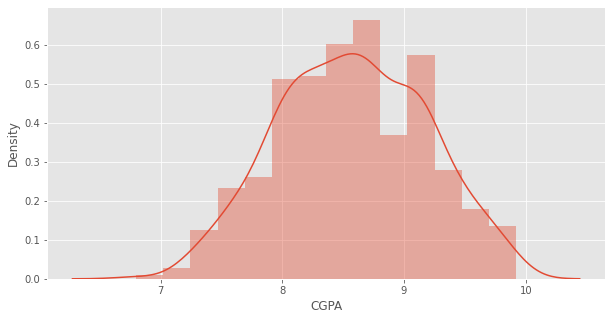

In [32]:
sns.distplot(df['CGPA'])

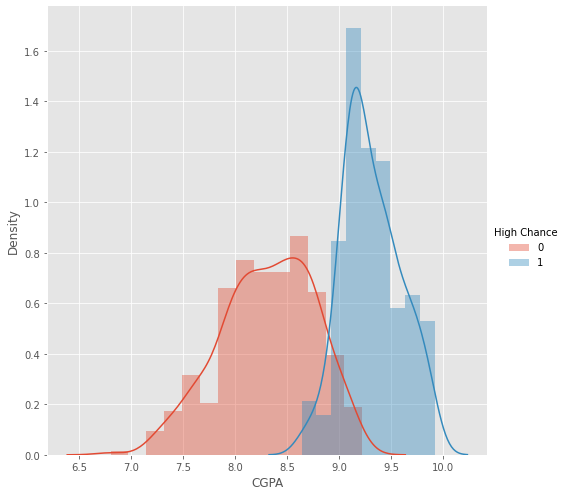

In [33]:
sns.FacetGrid(df,hue='High Chance',height=7).map(sns.distplot,'CGPA').add_legend()
plt.show()

- The higher the PDF(probability distribution function) of two classes be separated from each other the more likely the feature will help in predicting the output (Chance of Admit).

- And from the above diagrams, it can be seen that CGPA has the most separation. Which implies CGPA will be the most prominent factor determining a high chance of admit.

#### Chance of Admit for Researchers / Non Researchers

In [34]:
researcher = df[df['Research'] == 1]['Chance of Admit']
non_researcher = df[df['Research'] == 0]['Chance of Admit']

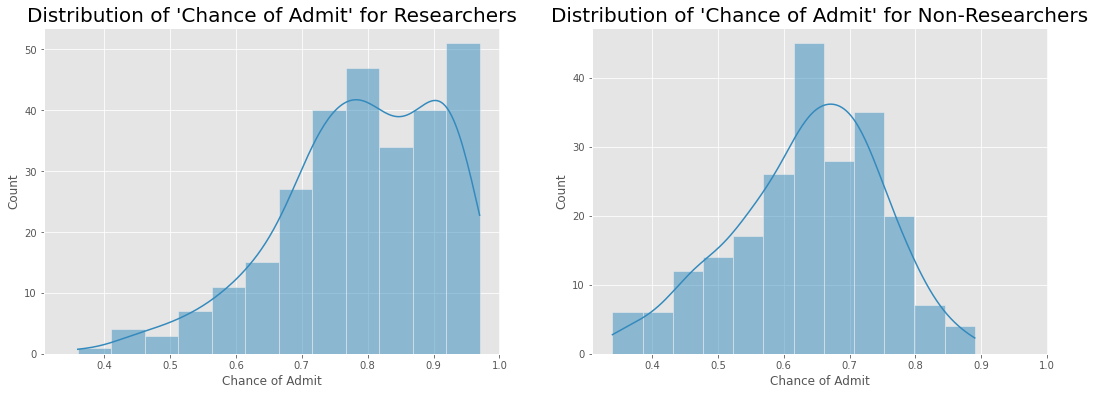

In [35]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(researcher, kde=True, ax=axes[0]).set_title("Distribution of 'Chance of Admit' for Researchers", fontsize=20)
sns.histplot(non_researcher, kde=True, ax=axes[1]).set_title("Distribution of 'Chance of Admit' for Non-Researchers", fontsize=20)
plt.show()

### Bivariate Analysis

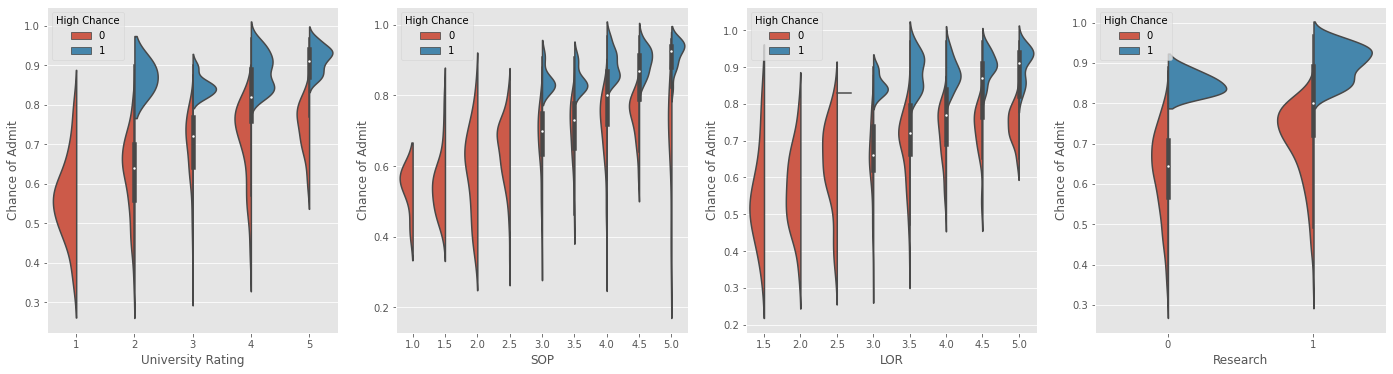

In [36]:
fig,ax = plt.subplots(1,n_cat_cols,figsize=(6*n_cat_cols,6))

for i,col in enumerate(cat_columns):
    plt.subplot(1,4,i+1)
    sns.violinplot(data=df,x=col,y='Chance of Admit',hue="High Chance",split=True)
plt.show()

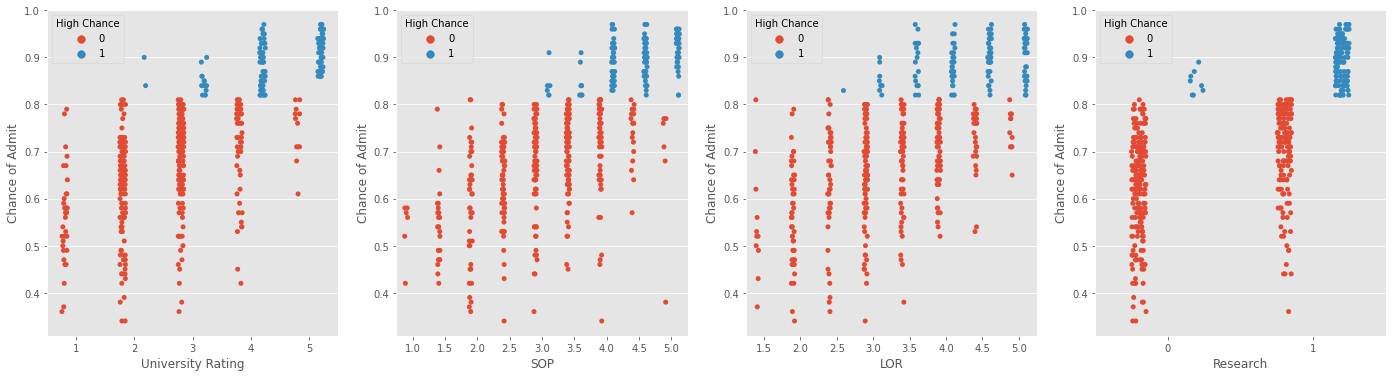

In [37]:
fig,ax = plt.subplots(1,n_cat_cols,figsize=(6*n_cat_cols,6))

for i,col in enumerate(cat_columns):
    plt.subplot(1,4,i+1)
    sns.stripplot(data=df,x=col,y='Chance of Admit',hue="High Chance",split=True)
plt.show()

From the above, we can conclude that:

- **University Rating**: It shows that if a student's University rating is good, the chance of admit increases. A student who studied in a university with rating 4 or 5 has a higher chance.

- **SOP**: An SOP score more than 4 will be favourable.

- **LOR**: Higher chance is seen for candidates with score more than 4.5.

- **Research**: Many students who had high acceptance chance had a history of publishing paper. However, there are many students who published paper yet having low chance.

#### Does having a good GRE score or TOEFL score or CGPA aids in higher chance of Admit?¶


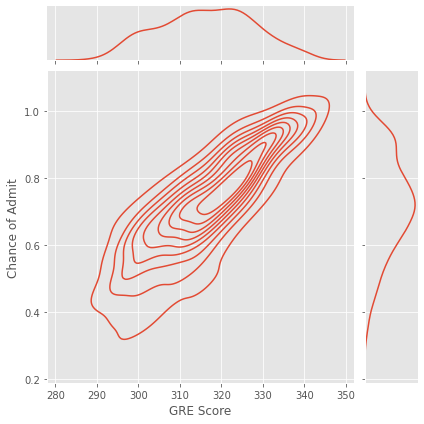

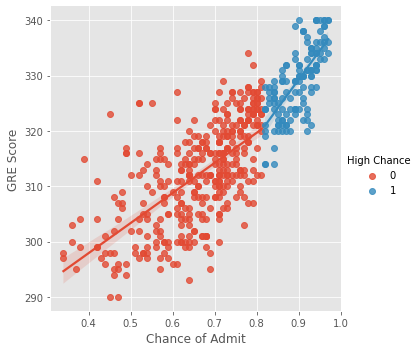

In [38]:
sns.jointplot(data=df,x="GRE Score",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,y="GRE Score",x='Chance of Admit',hue="High Chance")
plt.show()

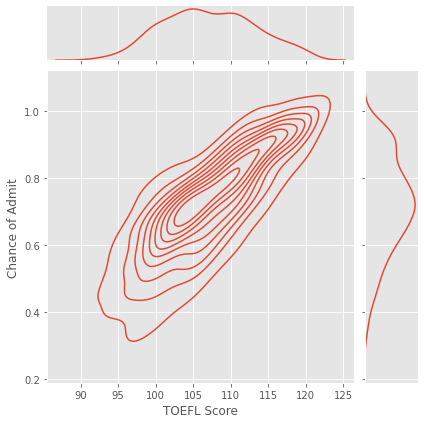

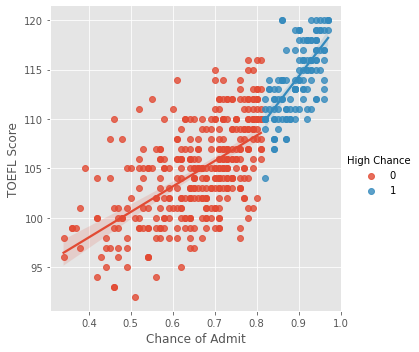

In [39]:
sns.jointplot(data=df,x="TOEFL Score",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,y="TOEFL Score",x='Chance of Admit',hue="High Chance")
plt.show()

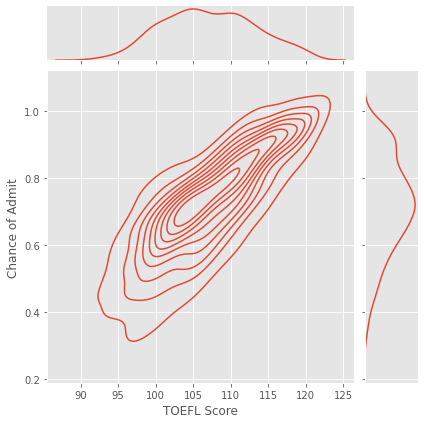

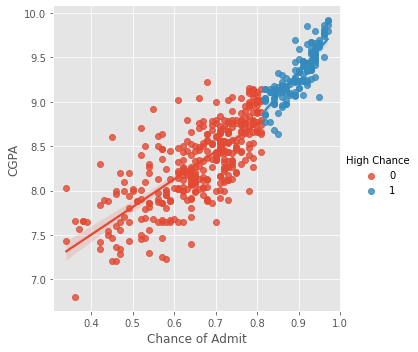

In [40]:
sns.jointplot(data=df,x="TOEFL Score",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,y="CGPA",x='Chance of Admit',hue="High Chance")
plt.show()

- All the 3 features have strong linear relationship with Chance of Admit

Now, lets compare the relationship among these 3 variables:

    1. GRE Score vs TOEFL Score
    2. GRE Score vs CGPA
    3. TOEFL Score vs CGPA

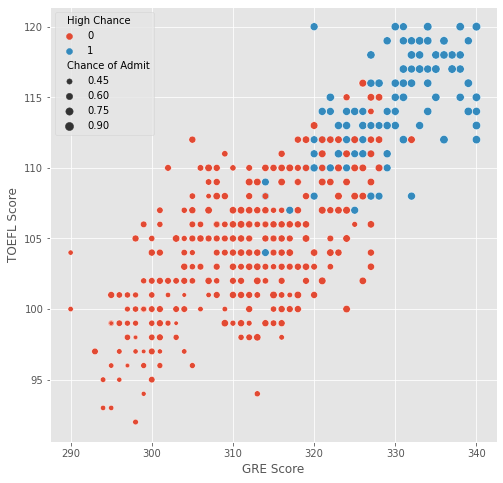

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="GRE Score",y='TOEFL Score',size="Chance of Admit",hue="High Chance")

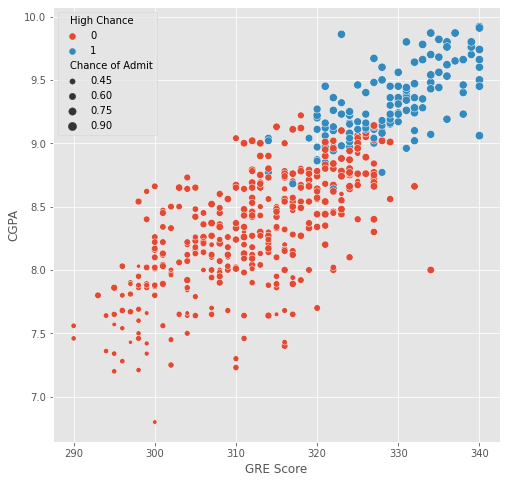

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="GRE Score",y='CGPA',size="Chance of Admit",hue="High Chance")

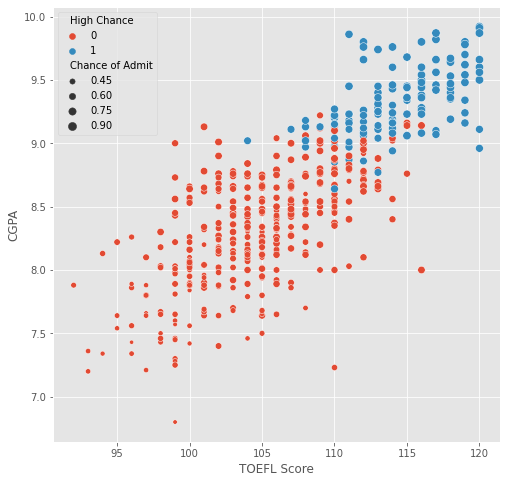

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="TOEFL Score",y='CGPA',size="Chance of Admit",hue="High Chance")

- From above, we can infer that, if a student maintains good GPA and has high GRE and TOEFL score, he is having more chances of admit

Now, lets compare the relation between each of the categorical variable and Target variable - Chance of Admit 

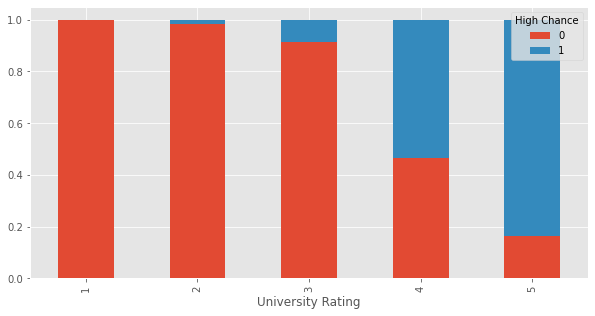

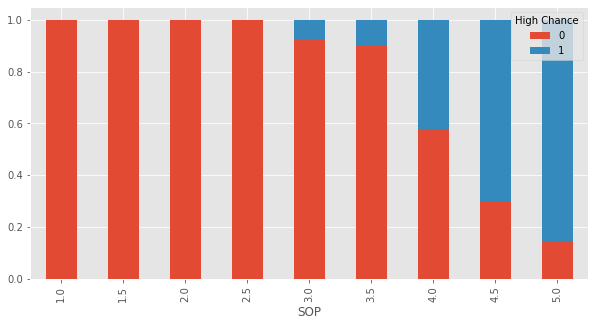

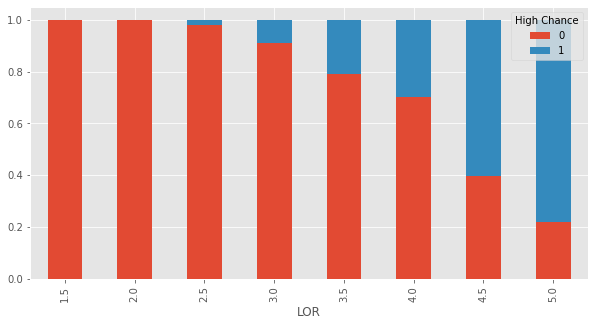

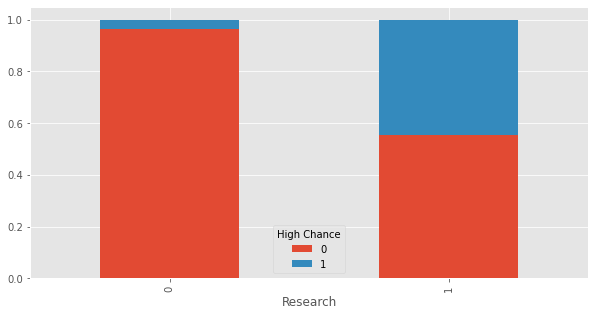

In [44]:
for col in cat_columns:
    pd.crosstab(df[col],df['High Chance'])
    ct = pd.crosstab(df[col],df['High Chance'],normalize="index")
    ct.plot.bar(stacked=True)
    plt.show()

Insights:
    
    1. As the university rating increases, chance of admit also increases. More chances of admit for universities with rating > 3 
    2. Writing a good SOP and getting good LOR also increases the chance of admit. An SOP of rating 4 and above has more chances of admit than rejection
    3. Having research experience will also increase the chance of admit

#### Correlation between columns

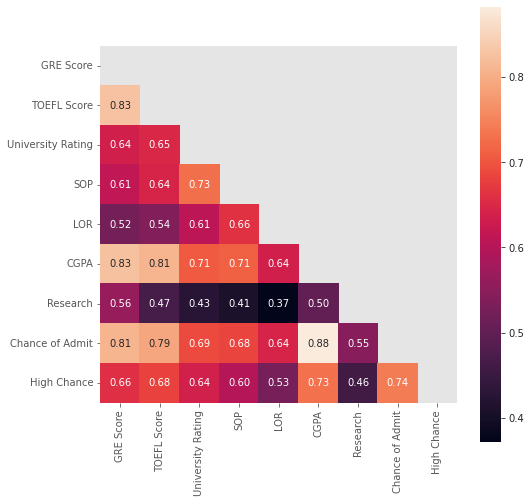

In [45]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(8, 8))
with sns.axes_style("white"):
    sns.heatmap(corr, ax=ax, annot=True, mask=mask, square=True,fmt= '.2f')
plt.show()

From above, we can see that, 

- Chance of Admit is highly correlated with:

    1. CGPA - 0.88
    2. GRE Score - 0.81
    3. TOEFL Score - 0.79
    
    
- Chance of Admit is least correlated with:

    1. Research - 0.55
    2. LOR - 0.64

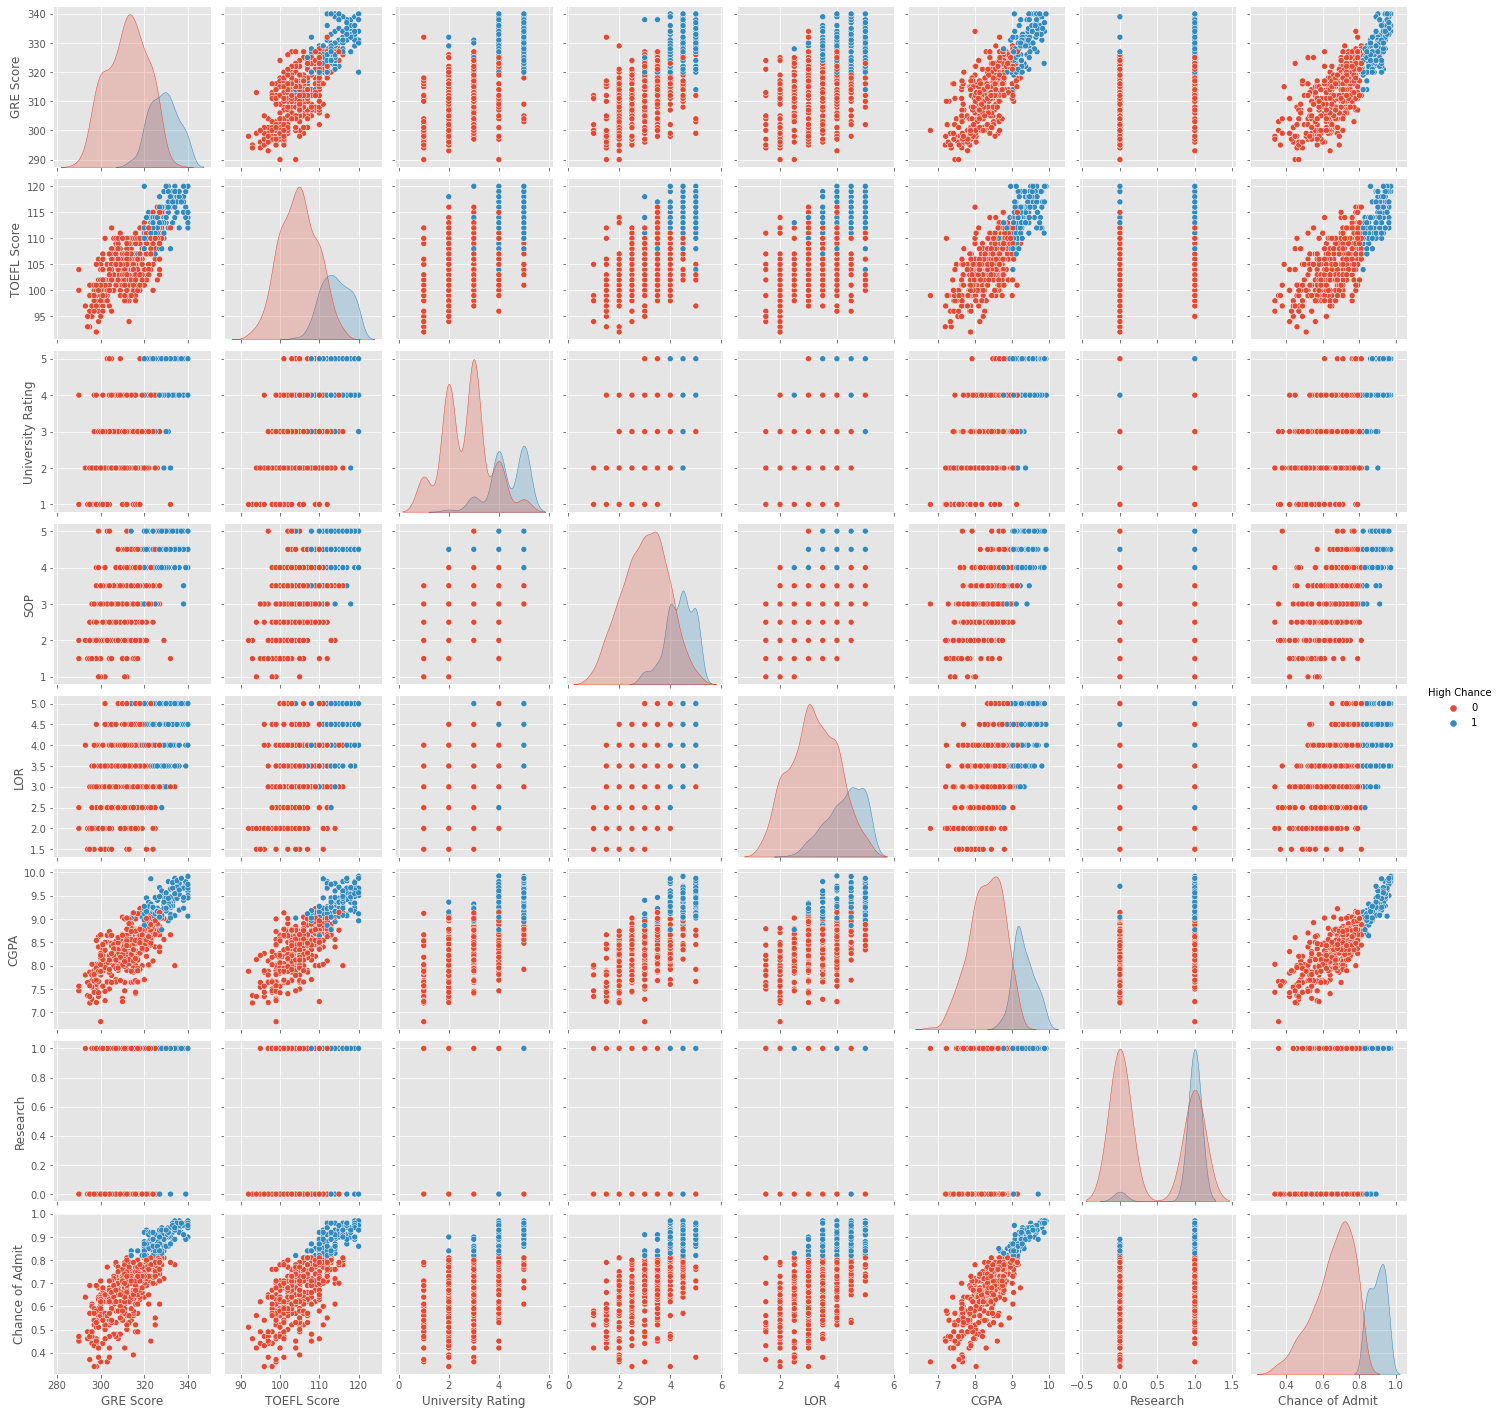

In [46]:
sns.pairplot(df,hue ='High Chance')

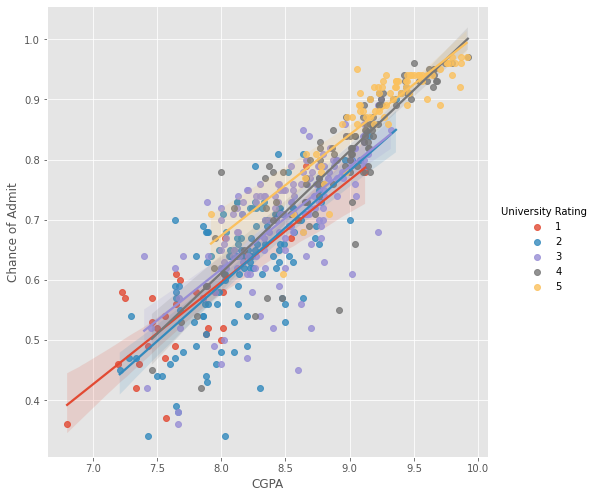

In [47]:
sns.pairplot(data=df,hue='University Rating',kind='reg',height = 7, 
            x_vars = 'CGPA', y_vars = 'Chance of Admit')

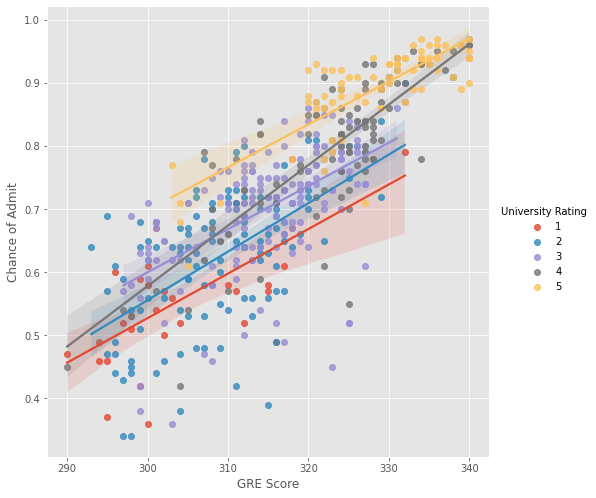

In [48]:
sns.pairplot(data=df,hue='University Rating',kind='reg',height = 7, 
            x_vars = 'GRE Score', y_vars = 'Chance of Admit')

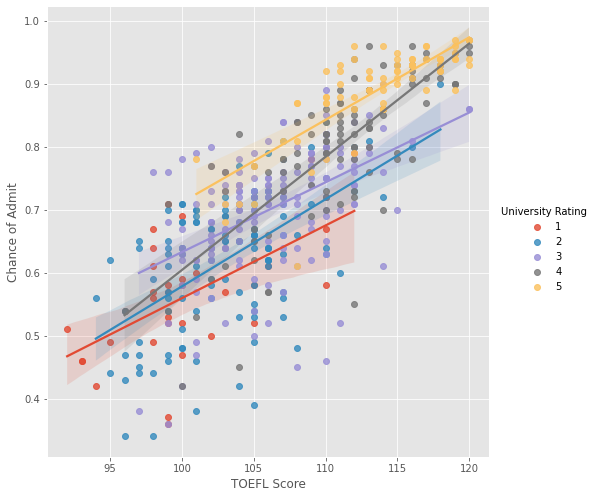

In [49]:
sns.pairplot(data=df,hue='University Rating',kind='reg',height = 7, 
            x_vars = 'TOEFL Score', y_vars = 'Chance of Admit')

### Hypothesis testing

#### T - test to identify relationship between Research and Chance of Admit

In [50]:
researcher

0      0.92
1      0.76
2      0.72
3      0.80
5      0.90
       ... 
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
Name: Chance of Admit, Length: 280, dtype: float64

In [51]:
non_researcher

4      0.65
7      0.68
8      0.50
9      0.45
15     0.54
       ... 
487    0.79
489    0.65
491    0.54
498    0.73
499    0.84
Name: Chance of Admit, Length: 220, dtype: float64

Assumptions for T-test:

1. Normality: Samples should follow the normal distribution. For this, we can do shapiro-wilk test
2. Homogeneity: Samples have approximately same variance. For this, we can do levene test

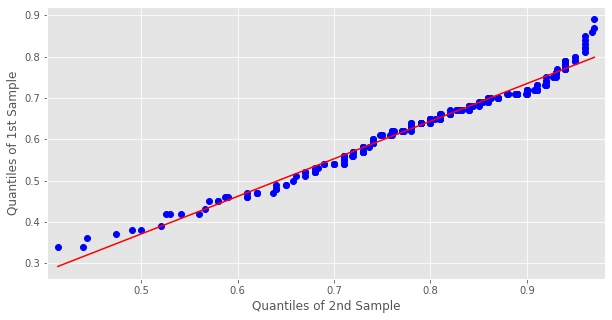

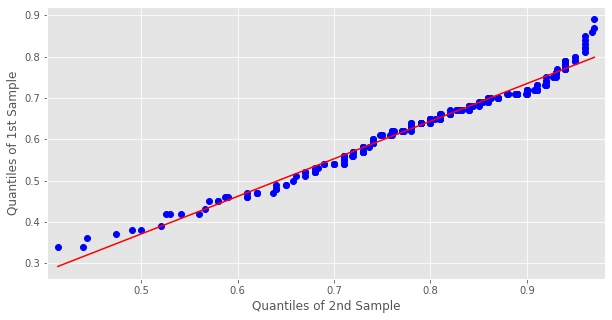

In [52]:
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
qqplot_2samples(researcher,non_researcher,line='r')

- Most of the data points are on the line, so they are normal

#### For equal variance, we use Levene's test

In [53]:
from scipy.stats import levene

levene(researcher,non_researcher)

LeveneResult(statistic=2.291641098174848, pvalue=0.130706702224074)

- As p-value is > 0.05, the variances of researcher and non_researcher are not significantly different. Hence, we can say that they are of equal variance

In [54]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(researcher,non_researcher)

In [55]:
print(f'Test_statistic:{test_stat} \np-value: {p_value}')

Test_statistic:14.538797385517404 
p-value: 3.5954935458409782e-40


- As p-value is very less than 0.05, we can say that Chances of Admit is higher when applicants have research experience compared to those who doesn't, which was also confirmed visually

### Data Preprocessing

Duplicate check, Missing value check and Outlier check has already been done, there are none of these, hence we move forward with feature engineering

In [56]:
#dropping high chance column as analysis is completed. 
df.drop(columns = 'High Chance',inplace = True)

### Train CV Test split

In [57]:
Y = df['Chance of Admit']
df.drop(columns=['Chance of Admit'], inplace=True)
X = df

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Number of rows in train data = {X_train.shape[0]}")
print(f"Number of rows in CV data = {X_cv.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")

Number of rows in train data = 320
Number of rows in CV data = 80
Number of rows in test data = 100


In [59]:
train_features_scaled = []
test_features_scaled = []
cv_features_scaled = []
to_be_scaled = sorted(list(set(df.columns) - {"Research"}))
print(f"Columns to be scaled = {to_be_scaled}")
for col in to_be_scaled:
    scaler = StandardScaler()
    train_std_feature = scaler.fit_transform(np.array(X_train[col]).reshape((-1, 1)))
    cv_std_feauture = scaler.transform(np.array(X_cv[col]).reshape((-1, 1)))
    test_std_feauture = scaler.transform(np.array(X_test[col]).reshape((-1, 1)))

    train_features_scaled.append(train_std_feature)
    cv_features_scaled.append(cv_std_feauture)
    test_features_scaled.append(test_std_feauture)

Columns to be scaled = ['CGPA', 'GRE Score', 'LOR', 'SOP', 'TOEFL Score', 'University Rating']


In [60]:
## OHE for categorical columns
ohe = OneHotEncoder()
research_train = ohe.fit_transform(np.array(X_train['Research']).reshape((-1, 1)))
research_cv = ohe.transform(np.array(X_cv['Research']).reshape((-1, 1)))
research_test = ohe.transform(np.array(X_test['Research']).reshape((-1, 1)))

In [61]:
## Combining them into dataframe

feature_name_train =  {}
feature_name_cv =  {}
feature_name_test =  {}

for idx, col in enumerate(to_be_scaled):
    feature_name_train[col] = train_features_scaled[idx].reshape(-1,)
    feature_name_cv[col] = cv_features_scaled[idx].reshape(-1,)
    feature_name_test[col] = test_features_scaled[idx].reshape(-1,)

feature_name_train['Research'] = research_train
feature_name_cv['Research'] = research_cv
feature_name_test['Research'] = research_test

In [62]:
df_train = pd.DataFrame.from_dict(feature_name_train)
df_cv = pd.DataFrame.from_dict(feature_name_cv)
df_test = pd.DataFrame.from_dict(feature_name_test)

In [63]:
X_tr = hstack((
    train_features_scaled[0],
    train_features_scaled[1],
    train_features_scaled[2],
    train_features_scaled[3],
    train_features_scaled[4],
    train_features_scaled[5],
    research_train
))

X_cv = hstack((
    cv_features_scaled[0],
    cv_features_scaled[1],
    cv_features_scaled[2],
    cv_features_scaled[3],
    cv_features_scaled[4],
    cv_features_scaled[5],
    research_cv
))

X_te = hstack((
    test_features_scaled[0],
    test_features_scaled[1],
    test_features_scaled[2],
    test_features_scaled[3],
    test_features_scaled[4],
    test_features_scaled[5],
    research_test
))

In [64]:
print(f"X_tr's shape = {X_tr.shape}")
print(f"X_cv's shape = {X_cv.shape}")
print(f"X_te's shape = {X_te.shape}")

X_tr's shape = (320, 8)
X_cv's shape = (80, 8)
X_te's shape = (100, 8)


## Linear Regression Model

### Train baseline model

In [65]:
model = LinearRegression()
model.fit(X_tr, y_train)
print(f"Train R2 Score = {model.score(X_tr, y_train).round(3)}")
print(f"CV R2 Score = {model.score(X_cv, y_cv).round(3)}")

Train R2 Score = 0.833
CV R2 Score = 0.823


### Ridge Regression 

In [66]:
train_scores = []
cv_scores = []

for lamb in [10**x for x in range(-4, 4)]:
    ridge = Ridge(alpha=lamb, random_state=1)
    ridge.fit(X_tr, y_train)
    train_scores.append(ridge.score(X_tr, y_train).round(3))
    cv_scores.append(ridge.score(X_cv, y_cv).round(3))

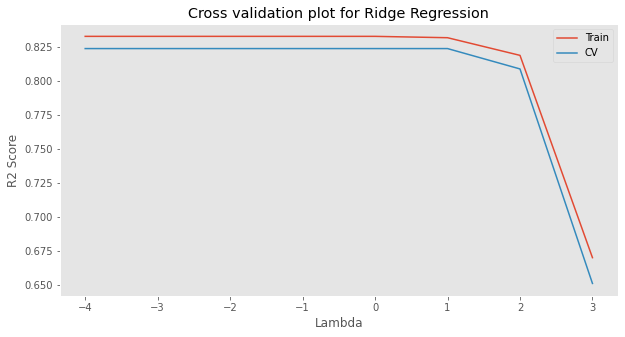

In [67]:
alphas = list(range(-4, 4))
plt.plot(alphas, train_scores, label='Train')
plt.plot(alphas, cv_scores, label='CV')
plt.xticks(list(range(-4, 4)))
plt.xlabel("Lambda")
plt.ylabel("R2 Score")
plt.grid()
plt.legend()
plt.title("Cross validation plot for Ridge Regression")
plt.show()

In [68]:
best_cv_score_idx = np.argmax(cv_scores)
print(f"Best lambda = {alphas[best_cv_score_idx]}\nBest train R2 score = {train_scores[best_cv_score_idx]}\nBest CV R2 score = {cv_scores[best_cv_score_idx]}")

Best lambda = -4
Best train R2 score = 0.833
Best CV R2 score = 0.824


### Lasso Regression

In [69]:
train_scores = []
cv_scores = []

for lamb in [10**x for x in range(-5, 5)]:
    lasso = Lasso(alpha=lamb, random_state=1)
    lasso.fit(X_tr, y_train)
    train_scores.append(lasso.score(X_tr, y_train).round(3))
    cv_scores.append(lasso.score(X_cv, y_cv).round(3))

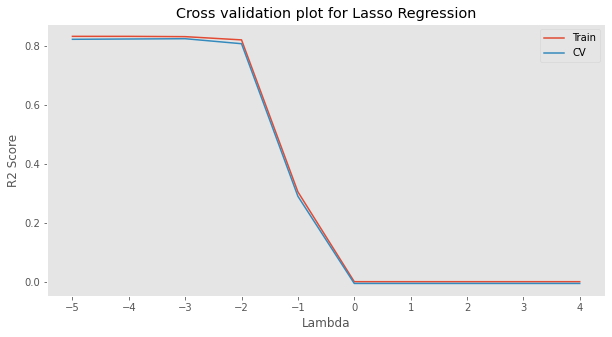

In [70]:
alphas = list(range(-5, 5))
plt.plot(alphas, train_scores, label='Train')
plt.plot(alphas, cv_scores, label='CV')
plt.xticks(list(range(-5, 5)))
plt.xlabel("Lambda")
plt.ylabel("R2 Score")
plt.grid()
plt.legend()
plt.title("Cross validation plot for Lasso Regression")
plt.show()

In [71]:
best_cv_score_idx = np.argmax(cv_scores)
print(f"Best lambda = {alphas[best_cv_score_idx]}\nBest train R2 score = {train_scores[best_cv_score_idx]}\nBest CV R2 score = {cv_scores[best_cv_score_idx]}")

Best lambda = -3
Best train R2 score = 0.832
Best CV R2 score = 0.825


### Checking results

In [72]:
X_tr_sm = sm.add_constant(X_tr.toarray(), prepend=False)
X_cv_sm = sm.add_constant(X_cv.toarray(), prepend=False)
X_te_sm = sm.add_constant(X_te.toarray(), prepend=False)

In [73]:
df_train_sm = pd.DataFrame(
    X_tr_sm,
    columns = to_be_scaled + ['Research_No', 'Research_Yes', 'Constant'] 
)

df_cv_sm = pd.DataFrame(
    X_cv_sm,
    columns = to_be_scaled + ['Research_No', 'Research_Yes', 'Constant'] 
)

df_test_sm = pd.DataFrame(
    X_te_sm,
    columns = to_be_scaled + ['Research_No', 'Research_Yes', 'Constant'] 
)

In [74]:
model = sm.OLS(y_train.reset_index(drop=True), df_train_sm)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     221.6
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          5.06e-117
Time:                        15:26:41   Log-Likelihood:                 451.90
No. Observations:                 320   AIC:                            -887.8
Df Residuals:                     312   BIC:                            -857.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CGPA                  0.0718      0.00

- p-value of SOP is very high (0.544) than significant threshold (0.05), inferring that SOP is not significant in prediciting the chnace of admit

In [75]:
df_train_sm.drop(columns=['SOP'], inplace=True)
model = sm.OLS(y_train.reset_index(drop=True), df_train_sm)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     259.0
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          3.62e-118
Time:                        15:26:41   Log-Likelihood:                 451.71
No. Observations:                 320   AIC:                            -889.4
Df Residuals:                     313   BIC:                            -863.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CGPA                  0.0711      0.00

All p-values are less than the significance level, thus indicating the weights are stable, now we can train our final model

### Final Model

As we saw above, p-value of SOP is much higher than significance level and its weights are unstable, so let's drop the column for our final model

In [76]:
print(to_be_scaled)

['CGPA', 'GRE Score', 'LOR', 'SOP', 'TOEFL Score', 'University Rating']


In [77]:
X_tr_final = hstack((
    train_features_scaled[0],
    train_features_scaled[1],
    train_features_scaled[2],
    train_features_scaled[4],
    train_features_scaled[5],
    research_train
))

X_cv_final = hstack((
    cv_features_scaled[0],
    cv_features_scaled[1],
    cv_features_scaled[2],
    cv_features_scaled[4],
    cv_features_scaled[5],
    research_cv
))

X_te_final = hstack((
    test_features_scaled[0],
    test_features_scaled[1],
    test_features_scaled[2],
    test_features_scaled[4],
    test_features_scaled[5],
    research_test
))

In [78]:
X_final = vstack((X_tr_final, X_cv_final, X_te_final))
Y_final = np.concatenate([y_train, y_cv, y_test])
model = LinearRegression()
model.fit(X_final, Y_final)
print(f"Final R2 Score = {model.score(X_final, Y_final).round(3)}")

Final R2 Score = 0.822


### Feature Importance

In [79]:
cols = sorted(set(to_be_scaled) - {'SOP'}) + ['Research_No', 'Research_Yes']
print(cols)

['CGPA', 'GRE Score', 'LOR', 'TOEFL Score', 'University Rating', 'Research_No', 'Research_Yes']


In [80]:
weights = list(model.coef_)
for idx, col in enumerate(cols):
    print(f"Coefficient for feature {col} = {weights[idx].round(3)}")

Coefficient for feature CGPA = 0.074
Coefficient for feature GRE Score = 0.021
Coefficient for feature LOR = 0.016
Coefficient for feature TOEFL Score = 0.018
Coefficient for feature University Rating = 0.007
Coefficient for feature Research_No = -0.012
Coefficient for feature Research_Yes = 0.012


From the above, we can see that, CGPA is having highest coefficient (0.071), indicating its the most important feature of all features, followed by GRE Score, TOEFL Score

**Check for Assumptions of Linear Regression :**
    
    - Assumption of Linearity
    - Assumption of Multi-collinearity
    - Residual plot is normal
    - No heteroscedasticity 

### Assumption of Linearity

- Firstly, we got a very good R2 score (0.822), which suggests that, all the dependent variable is a linear combination of all the independent features

### Assumption of Multi-collinearity

In [81]:
df_train_vif = df_train.copy()

df_train_vif['Research'] = X_train['Research'].values

df_train_vif = add_constant(df_train_vif)
df_train_vif.head()

,const,CGPA,GRE Score,LOR,SOP,TOEFL Score,University Rating,Research
0,1.0,-1.527574,0.049783,-0.012026,-1.930069,-0.180521,-1.837507,1
1,1.0,-0.427057,0.223889,-1.111508,0.052666,-0.180521,-0.113160,1
2,1.0,1.466479,1.007365,1.637198,1.539718,1.415241,1.611187,1
3,1.0,0.090833,-0.298428,1.087457,0.548350,-0.499673,-0.113160,0
4,1.0,-0.702186,-1.430116,-0.561767,0.052666,-0.499673,-0.113160,0


In [82]:
df_vif = pd.DataFrame()
df_vif['Feature'] = df_train.columns
df_vif['VIF'] = [
    variance_inflation_factor(df_train_vif.values, idx).round(2) \
        for idx in range(df_train.shape[1])
]
df_vif.sort_values(by='VIF', ascending=False, inplace=True)

In [83]:
df_vif

,Feature,VIF
1,GRE Score,4.81
2,LOR,4.47
5,University Rating,3.93
0,CGPA,3.04
6,Research,2.80
4,TOEFL Score,2.74
3,SOP,2.03


#### VIF scores for all features are less than 5, so there is less or not significant multicollinearity among features

### Assumption of Normality of residual plot

In [95]:
X_final.shape

(500, 7)

In [84]:
Y_pred = model.predict(X_final)
errors = Y_final - Y_pred

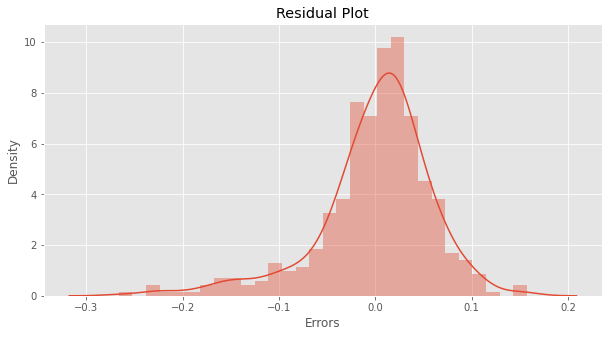

In [85]:
sns.distplot(errors,kde=True)
plt.title("Residual Plot")
plt.xlabel("Errors")
plt.show()

In [86]:
from scipy.stats import shapiro
print(f"P-value for Shapiro wilk test of normality = {shapiro(errors)[1]}")

P-value for Shapiro wilk test of normality = 6.600686353562795e-15


- The residual plot is not normal, as it has long left tail, and also shapiro value is very less (in range of -e15). Also, we checked there were no outliers in the data / handled them

### No Heteroscedasticity

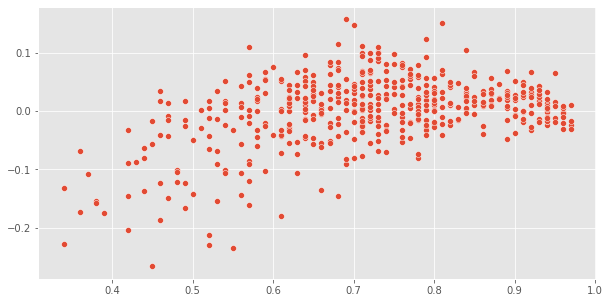

In [87]:
sns.scatterplot(Y_final, errors)
plt.show()

- For the datapoints where "Chance of Admit" is less, variance is high which means that there is some heteroskedasticity, the model is performing better when chance of admit is higher as compared to when chance of admit is lower

**Auto correlation is not checked as it is a problem mostly in time-series data and this is not a time-series data. Hence it should not be any problem**

### Evaluation metrics

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
def adj_r2(n, d):
    r2 = r2_score(Y_final, Y_pred)
    return (1 - (1-r2)*(n-1)/(n-d-1)).round(3)

In [90]:
print('Mean Absolute error of model: ',mean_absolute_error(Y_final,Y_pred).round(4))
print('Mean Squared error of model: ',mean_squared_error(Y_final,Y_pred).round(4))
print('Root Mean Squared error of model: ',np.sqrt(mean_squared_error(Y_final,Y_pred).round(4)))
print('R2 score of model: ',r2_score(Y_final,Y_pred).round(4))
print('Adjusted R2 score of model: ',adj_r2(X_final.shape[0],X_final.shape[1]).round(4))

Mean Absolute error of model:  0.0426
Mean Squared error of model:  0.0035
Root Mean Squared error of model:  0.05916079783099616
R2 score of model:  0.8218
Adjusted R2 score of model:  0.819


In [94]:
print("Y Final shape:",Y_final.shape)
print("Y pred shape:",Y_pred.shape)

Y Final shape: (500,)
Y pred shape: (500,)


## Business Insights

- There are more students with Research experience compared to students without Research experience.
- Researchers have significantly more chances of admission compared to the Non-Researchers with 95% of confidence.
- Students with Research experience have higher GRE Score, TOEFL Score and CGPA compared to Non-Researchers.
- Students with Research experience study in Universiies with higher ratings compared to Non-Researchers.
- There is a very high correlation between GRE Score, TOEFL Score and CGPA.
- There is a high correlation between University Ratings, CGPA and SOP.
- Target variable 'Chance of admit' has high correlation with all the features.
- Mean of Residuals is almost 0
- Distribution of Residuals is Homoscedastic where Chance of Admit is high.
- Model performs good with R-Squared value of 0.8218 on test data.
- Model has R-Squared value almost equal to the Adjusted R-Squared implying that all the chosen predictors are significant.
- Ridge Regression model performs equally well with different alpha values compared to the OLS model.
- Lasso Regression model performs worse with different alpha values compared to the OLS model.

## Recommendations

- To predict Admission chances of a student, CGPA, GRE Score, TOEFL Score and Research Experience should be given more importance than other features.
- Students should be encouraged to maintain a higher CGPA Score, so as to improve their chances of admission, since it is the most significant predictor with coefficient value as 0.074.
- Students should be encouraged to write research papers or have some research experience as RA which can help in improving their chances of Admit
- Apart from CGPA, students should also focus on getting good GRE Score, TOEFL Score as Universities give preference to these factors as cut-off factor.
- Other factors such as how skilled they are in field they are applying for (as some universities conduct exams as part of their admission process), communication skills rating should be introduced (on scale of 5 or 10)